In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yahooFinance

In [2]:
import pandas as pd
data = pd.read_csv('ETH_Historical_Prices.csv', date_parser = True)
print(data.tail())

           Date          Adj Close              Close               High  \
687  17/11/2024   3075.66162109375   3075.66162109375  3160.152587890625   
688  18/11/2024    3207.8564453125    3207.8564453125  3225.130615234375   
689  19/11/2024  3111.384033203125  3111.384033203125   3222.00439453125   
690  20/11/2024   3072.18798828125   3072.18798828125  3159.949462890625   
691  22/11/2024   3333.97119140625   3333.97119140625   3374.04345703125   

                   Low               Open       Volume  
687  3039.246826171875     3133.306640625  28348163224  
688    3052.4912109375  3075.722900390625  35445557613  
689   3070.36279296875   3208.25048828125  29823634432  
690  3032.603271484375  3111.116943359375  29785491216  
691    3310.3017578125   3359.41064453125  52464992256  


C:\Users\Dung\AppData\Local\Temp\ipykernel_17508\4269081090.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('ETH_Historical_Prices.csv', date_parser = True)


In [3]:
data_training = data[data['Date']< '2023-01-01'].copy()
data_training

,Date,Adj Close,Close,High,Low,Open,Volume
1,01/01/2023,1200.96484375,1200.96484375,1203.475341796875,1192.8853759765625,1196.713623046875,2399674550
2,02/01/2023,1214.6566162109375,1214.6566162109375,1219.860595703125,1195.2149658203125,1201.103271484375,3765758498
3,03/01/2023,1214.77880859375,1214.77880859375,1219.0953369140625,1207.4915771484375,1214.7440185546875,3392972131
4,04/01/2023,1256.526611328125,1256.526611328125,1264.8074951171875,1213.1688232421875,1214.7186279296875,6404416893
5,05/01/2023,1250.4385986328125,1250.4385986328125,1258.571533203125,1245.173095703125,1256.484619140625,4001786456
...,...,...,...,...,...,...,...
686,16/11/2024,3133.27392578125,3133.27392578125,3218.089599609375,3073.286376953125,3089.739990234375,26650658846
687,17/11/2024,3075.66162109375,3075.66162109375,3160.152587890625,3039.246826171875,3133.306640625,28348163224
688,18/11/2024,3207.8564453125,3207.8564453125,3225.130615234375,3052.4912109375,3075.722900390625,35445557613
689,19/11/2024,3111.384033203125,3111.384033203125,3222.00439453125,3070.36279296875,3208.25048828125,29823634432


In [4]:
data_test = data[data['Date']< '2020-01-01'].copy()
data_test

,Date,Adj Close,Close,High,Low,Open,Volume
1,01/01/2023,1200.96484375,1200.96484375,1203.475341796875,1192.8853759765625,1196.713623046875,2399674550
2,02/01/2023,1214.6566162109375,1214.6566162109375,1219.860595703125,1195.2149658203125,1201.103271484375,3765758498
3,03/01/2023,1214.77880859375,1214.77880859375,1219.0953369140625,1207.4915771484375,1214.7440185546875,3392972131
4,04/01/2023,1256.526611328125,1256.526611328125,1264.8074951171875,1213.1688232421875,1214.7186279296875,6404416893
5,05/01/2023,1250.4385986328125,1250.4385986328125,1258.571533203125,1245.173095703125,1256.484619140625,4001786456
...,...,...,...,...,...,...,...
686,16/11/2024,3133.27392578125,3133.27392578125,3218.089599609375,3073.286376953125,3089.739990234375,26650658846
687,17/11/2024,3075.66162109375,3075.66162109375,3160.152587890625,3039.246826171875,3133.306640625,28348163224
688,18/11/2024,3207.8564453125,3207.8564453125,3225.130615234375,3052.4912109375,3075.722900390625,35445557613
689,19/11/2024,3111.384033203125,3111.384033203125,3222.00439453125,3070.36279296875,3208.25048828125,29823634432


In [5]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Close,High,Low,Open,Volume
1,1200.96484375,1203.475341796875,1192.8853759765625,1196.713623046875,2399674550
2,1214.6566162109375,1219.860595703125,1195.2149658203125,1201.103271484375,3765758498
3,1214.77880859375,1219.0953369140625,1207.4915771484375,1214.7440185546875,3392972131
4,1256.526611328125,1264.8074951171875,1213.1688232421875,1214.7186279296875,6404416893
5,1250.4385986328125,1258.571533203125,1245.173095703125,1256.484619140625,4001786456


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , 0.        , 0.0048493 ],
       [0.00477818, 0.00567198, 0.00084906, 0.00152951, 0.02567804],
       [0.00482082, 0.00540707, 0.00532346, 0.00628242, 0.01999415],
       ...,
       [0.70036833, 0.69982314, 0.67776269, 0.65471236, 0.50870116],
       [0.66670123, 0.69874096, 0.68427627, 0.70088959, 0.42298348],
       [0.65302253, 0.67725981, 0.67051422, 0.66704488, 0.42240191]])

In [7]:
X_train = [] 
Y_train = []

# Assuming training_data is a 2D array or DataFrame
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])  # Append a sequence of 60 timesteps
    Y_train.append(training_data[i, 0])   # Append the target value at the current index

# Convert lists to NumPy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Print the shape of X_train to verify
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


X_train shape: (400, 60, 5)
Y_train shape: (400,)


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initialize the RNN
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with Dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer with Dropout
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=50, validation_split=0.1)

Epoch 1/20
8/8 [==============================] - 25s 2s/step - loss: 0.1696 - val_loss: 0.0239
Epoch 2/20
8/8 [==============================] - 14s 2s/step - loss: 0.0461 - val_loss: 0.0655
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 0.0431 - val_loss: 0.0292
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.0329 - val_loss: 0.0126
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.0272 - val_loss: 0.0340
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.0262 - val_loss: 0.0215
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.0244 - val_loss: 0.0298
Epoch 8/20
8/8 [==============================] - 15s 2s/step - loss: 0.0222 - val_loss: 0.0289
Epoch 9/20
8/8 [==============================] - 15s 2s/step - loss: 0.0222 - val_loss: 0.0214
Epoch 10/20
8/8 [==============================] - 15s 2s/step - loss: 0.0231 - val_loss: 0.0353
Epoch 11/20
8/8 [======================

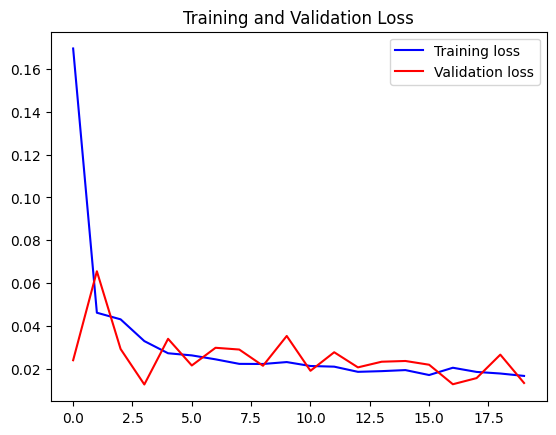

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [11]:
part_60_days = data_training.tail(60)
df = pd.concat([part_60_days, data_test], ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Close,High,Low,Open,Volume
0,2427.90234375,2515.46728515625,2401.88916015625,2513.42431640625,11800443265
1,2538.187255859375,2563.0859375,2426.095947265625,2427.973388671875,12520444224
2,2420.603759765625,2552.802734375,2419.875244140625,2538.16064453125,11406800197
3,2448.97705078125,2488.91650390625,2313.26513671875,2420.1923828125,16709600747
4,2367.737548828125,2465.38525390625,2348.86328125,2448.98681640625,13632325040


In [12]:
inputs = scaler.transform(df) 
inputs

array([[0.42817867, 0.45416364, 0.44064051, 0.45878792, 0.14818319],
       [0.46666608, 0.47064748, 0.44946305, 0.42901384, 0.15916107],
       [0.42563159, 0.46708781, 0.44719582, 0.46740692, 0.1421813 ],
       ...,
       [0.70036833, 0.69982314, 0.67776269, 0.65471236, 0.50870116],
       [0.66670123, 0.69874096, 0.68427627, 0.70088959, 0.42298348],
       [0.65302253, 0.67725981, 0.67051422, 0.66704488, 0.42240191]])

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming inputs is a 3D array of shape (samples, 60, features)
# Flatten the 3D array to 2D for LinearRegression
X_train_2d = X_train.reshape(X_train.shape[0], -1)  # Flatten the 60 timesteps
X_test_2d = X_test.reshape(X_test.shape[0], -1)    # Flatten the 60 timesteps for test data

# Train the regressor
regressor = LinearRegression()
regressor.fit(X_train_2d, Y_train)

# Predict using the trained regressor
Y_pred = regressor.predict(X_test_2d)

# Display predictions and true values
print(f"Y_pred: {Y_pred}")
print(f"Y_test: {Y_test}")


Y_pred: [ 0.81290582 -0.24723461  0.37785475 -0.2769497   0.05799992  0.08098736
  0.19078314 -0.06563193 -0.14110519 -0.13388145 -0.06917254  0.50848961
 -0.40688755 -0.03062738  0.59408189  0.03844047  0.20602654  0.24617545
  0.14757185 -0.17067508  0.3427342   0.50232775  0.04525101 -0.06455708
  0.14623616  0.14686491 -0.23298256 -0.09377997  0.25112059 -0.09263325
  0.2197462   0.19535256 -0.079288    0.17500882  0.63851045  0.09406145
  0.4072948   0.24515315  0.56559923 -0.22270898  0.2818787   0.29797274
 -0.16709557  0.41908864  0.22851503  0.10055037 -0.11955681 -0.04563559
  0.48200525 -0.25575519  0.32557466 -0.13863684  0.38790581  0.27420072
  0.28802765 -0.04625974  0.07412197  0.69675488  0.42892731 -0.19292291
  0.20941829  0.20535648  0.20086005  0.22736718  0.23746231  0.25271915
  0.22146235  0.21522805  0.22852831  0.24608611  0.25094753  0.24563929
  0.2779286   0.30452309  0.31721587  0.31902245  0.31687715  0.34315524
  0.28483159  0.27094191  0.22365548  0.235

In [16]:
# Initialize empty lists for X_test and Y_test
X_test = []
Y_test = []

# Create X_test and Y_test from the inputs
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])  # Add the last 60 values to X_test
    Y_test.append(inputs[i, 0])    # Add the target value to Y_test

# Convert lists to NumPy arrays
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Reshape X_test to 2D by flattening the 60 timesteps into a single row
X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten the 3D array to 2D

# Check the shapes of the resulting arrays
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

# Predict using the trained regressor (ensure regressor is defined and trained)
Y_pred = regressor.predict(X_test)

# Display predictions and true values
print(f"Y_pred: {Y_pred}")
print(f"Y_test: {Y_test}")

# Use the scaler's scale_
scaler_scale = scaler.scale_

# Reverting scaled values to original scale
scale = 1 / scaler_scale[0]  # Assuming we are only interested in the first feature's scale
Y_test = Y_test * scale
Y_pred = Y_pred * scale

# Display scaled results
print(f"Scaled Y_test: {Y_test}")
print(f"Scaled Y_pred: {Y_pred}")

X_test shape: (460, 300), Y_test shape: (460,)
Y_pred: [ 0.81290582 -0.24723461  0.37785475 -0.2769497   0.05799992  0.08098736
  0.19078314 -0.06563193 -0.14110519 -0.13388145 -0.06917254  0.50848961
 -0.40688755 -0.03062738  0.59408189  0.03844047  0.20602654  0.24617545
  0.14757185 -0.17067508  0.3427342   0.50232775  0.04525101 -0.06455708
  0.14623616  0.14686491 -0.23298256 -0.09377997  0.25112059 -0.09263325
  0.2197462   0.19535256 -0.079288    0.17500882  0.63851045  0.09406145
  0.4072948   0.24515315  0.56559923 -0.22270898  0.2818787   0.29797274
 -0.16709557  0.41908864  0.22851503  0.10055037 -0.11955681 -0.04563559
  0.48200525 -0.25575519  0.32557466 -0.13863684  0.38790581  0.27420072
  0.28802765 -0.04625974  0.07412197  0.69675488  0.42892731 -0.19292291
  0.20941829  0.20535648  0.20086005  0.22736718  0.23746231  0.25271915
  0.22146235  0.21522805  0.22852831  0.24608611  0.25094753  0.24563929
  0.2779286   0.30452309  0.31721587  0.31902245  0.31687715  0.34315

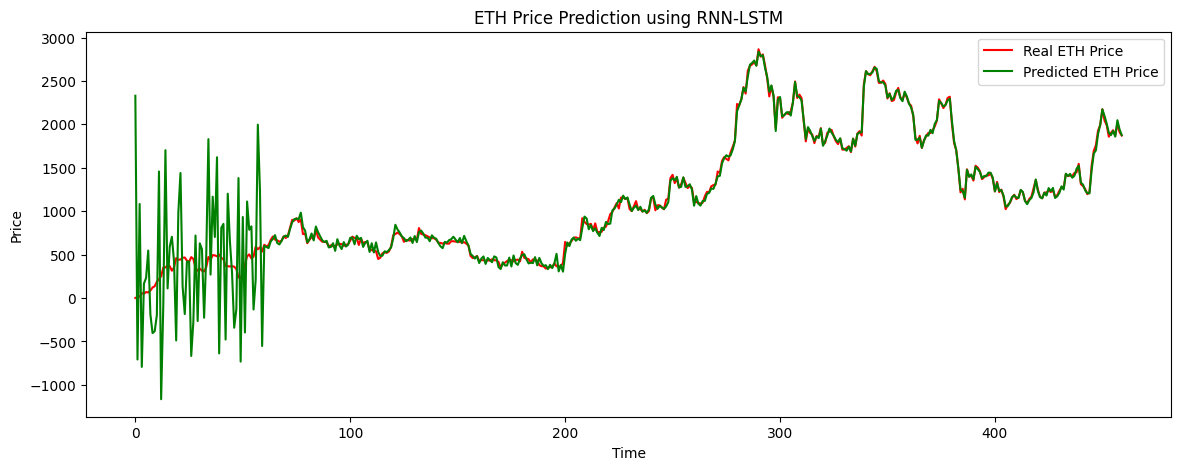

In [17]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real ETH Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted ETH Price')
plt.title('ETH Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Simulating a time-series dataset to demonstrate
np.random.seed(0)
dates = pd.date_range(start="2020-01-01", periods=1000)
data = pd.DataFrame({
    "Date": dates,
    "Price": np.cumsum(np.random.randn(1000)) + 100
})
data.set_index("Date", inplace=True)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sliding window sequences
def create_sequences(data, look_back, future_steps):
    X, y = [], []
    for i in range(len(data) - look_back - future_steps + 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[(i + look_back):(i + look_back + future_steps), 0])
    return np.array(X), np.array(y)

# Parameters
look_back = 60  # Number of past days to look back
future_steps = 30  # Predicting the next 30 days

# Creating sequences
X, y = create_sequences(scaled_data, look_back, future_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(future_steps)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predicting future prices
future_predictions = model.predict(X_test)

# Rescale predictions to original scale
future_predictions_rescaled = scaler.inverse_transform(
    np.hstack((future_predictions, np.zeros((future_predictions.shape[0], scaled_data.shape[1] - 1))))
)[:, 0]

future_predictions_rescaled[:5], history.history["loss"]
